# Supervised learning with scikit-learn

## Supervised Learning

.larger[
$$ (x_i, y_i) \propto p(x, y) \text{ i.i.d.}$$
$$ x_i \in \mathbb{R}^p$$
$$ y_i \in \mathbb{R}$$
$$\text{learn }f(x_i) \approx y_i$$
such that
$$f(x) \approx y \quad$$
for new $(x, y) \propto p(x, y)$.
]

As a reminder, in supervised learning, the dataset we learn form is
input-output pairs $(x_i, y_i)$, where $x_i$ is some n-dimensional input,
or feature vector, and $y_i$ is the desired output we want to learn to predict.
We assume these samples are drawn from some unknown joint distribution
$p(x, y)$.
You can think of this as there being some (not necessarily deterministic)
process that goes from $x_i$ to $y_i$, but that we don’t know.
We try to find a function that approximates the output $y_i$ for each known
input $x_i$. But we also demand that for new inputs $x$ , and unobserved $y$,
$f(x)$ is approximately $y$.

I want to go through a simple examples of supervised algorithms today,
nearest neighbors 

## Nearest Neighbors


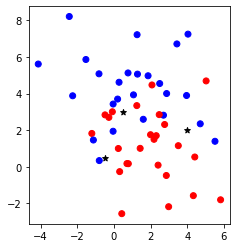

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "300"
plt.rcParams['savefig.bbox'] = "tight"

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure()
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)

X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker="*");


$$f(x) = y_i, i = \text{argmin}_j || x_j - x||$$


Let’s say we have this two-class classification dataset here, with
two features, one on the x axis and one on the y axis.
And we have three new points as marked by the stars here.
If I make a prediction using a one nearest neighbor classifier, what
will it predict?
It will predict the label of the closest data point in the training set.
That is basically the simplest machine learning algorithm I can come
up with.

Here’s the formula:
the prediction for a new x is the y_i so that x_i is the closest point
in the training set.
Ok, so now how do we find out whether this model is any good?

![:scale 60%](images/train_test_set_2d_classification.png)


The simplest way is to split the data into a training and a test set.
So we take some part of the data set,  let’s say 75% and the
corresponding output, and train the model, and then apply the model on
the remaining 25% to compute the accuracy. This test-set accuracy
will provide an unbiased estimate of future performance.
So if our i.i.d. assumption is correct, and we get a 90% success
rate on the test data, we expect about a 90% success rate on any future
data, for which we don't have labels.

Let's dive into how to build and evaluate this model with scikit-learn.

## KNN with scikit-learn

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

accuracy:  0.6153846153846154



We import train_test_split form model selection, which does a
random split into 75%/25%.
We provide it with the data X, which are our two features, and the
labels y.

As you might already know, all the models in scikit-learn are implemented
in python classes, with a single object used to build and store the model.

We start by importing our model, the KneighborsClassifier, and instantiate
it with n_neighbors=1. Instantiating the object is when we set any hyper parameter,
such as here saying that we only want to look at the neirest neighbor.

Then we can call the fit method to build the model, here knn.fit(X_train,
y_train)
All models in scikit-learn have a fit-method, and all the supervised ones take
the data X and the outcomes y. The fit method builds the model and stores any
estimated quantities in the model object, here knn.  In the case of nearest
neighbors, the `fit` methods simply remembers the whole training set.

Then, we can use knn.score to make predictions on the test data, and
compare them against the true labels y_test.

For classification models, the score method will always compute
accuracy.

Just for illustration purposes, I also call the predict method here.
The predict method is what's used to make predictions on any dataset.
If we use the score method, it calls predict internally and then
compares the outcome to the ground truth that's provided.

Who here has not seen this before?

## Influence of Number of Neighbors


So this was the predictions as made by one-nearest neighbor.
But we can also consider more neighbors, for example three. Here is the
three nearest neighbors for each of the points and the corresponding
labels.
We can then make a prediction by considering the majority among these
three neighbors.
And as you can see, in this case all the points changed their labels! (I
was actually quite surprised when I saw that, I just picked some points
at random).
Clearly the number of neighbors that we consider matters a lot. But what
is the right number?
The is a problem you’ll encounter a lot in machine learning, the
problem of tuning parameters of the model, also called hyper-parameters,
which can not be learned directly from the data.


So this was the predictions as made by one-nearest neighbor.
But we can also consider more neighbors, for example three. Here is the
three nearest neighbors for each of the points and the corresponding
labels.
We can then make a prediction by considering the majority among these
three neighbors.
And as you can see, in this case all the points changed their labels! (I
was actually quite surprised when I saw that, I just picked some points
at random).
Clearly the number of neighbors that we consider matters a lot. But what
is the right number?
The is a problem you’ll encounter a lot in machine learning, the
problem of tuning parameters of the model, also called hyper-parameters,
which can not be learned directly from the data.

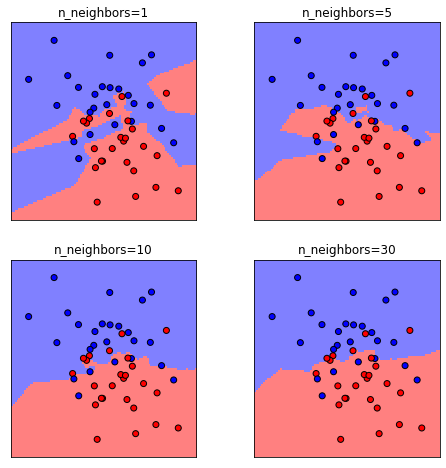

In [3]:
import sys
sys.path.append("..")
from utils import plot_2d_classification
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title(f"n_neighbors={n_neighbors}")
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")


Here’s an overview of how the classification changes if we consider
different numbers of neighbors.
You can see as red and blue circles the training data. And the background
is colored according to which class a datapoint would be assigned to
for each location.
For one neighbor, you can see that each point in the training set has
a little area around it that would be classified according to it’s
label. This means all the training points would be classified correctly,
but it leads to a very complex shape of the decision boundary.
If we increase the number of neighbors, the boundary between red and
blue simplifies, and with 40 neighbors we mostly end up with a line.
This also means that now many of the training data points would be
labeled incorrectly.

## Model complexity

![:scale 75%](images/knn_model_complexity.png)


We can look at this in more detail by comparing training and test set
scores for the different numbers of neighbors.
Here, I did a random 75%/25% split again. This is a very noisy plot as
the dataset is very small and I only did a random split, but you can
see a trend here.
You can see that for a single neighbor, the training score is 1 so perfect
accuracy, but the test score is only 70%.  If we increase the number of
neighbors we consider, the training score goes down, but the test score
goes up, with an optimum at 19 and 21, but then both go down again.

This is a very typical behavior, that I sketched in a schematic for you.


here is a cartoon version of how this chart looks in general, though
it's horizontally flipped to the one with saw for knn.
This chart has accuracy on the y axis, and the abstract concept of model
complexity on the x axis.
If we make our machine learning models more complex, we will get better
training set accuracy, as the model will be able to capture more of the
variations in the data.


But if we look at the generalization performance, we get a different
story. If the model complexity is too low, the model will not be able
to capture the main trends, and a more complex model means better
generalization.
However, if we make the model too complex, generalization performance
drops again, because we basically learn to memorize the dataset.



## Overfitting and Underfitting

![:scale 80%](images/overfitting_underfitting_cartoon_full.png)


If we use too simple a model, this is often called underfitting, while
if we use to complex a model, this is called overfitting. And somewhere
in the middle is a sweet spot.
Most models have some way to tune model complexity, and we’ll see many
of them in the next couple of weeks.
So going back to nearest neighbors, what parameters correspond to high
model complexity and what to low model complexity? high n_neighbors =
low complexity!

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
blood = fetch_openml('blood-transfusion-service-center')

X_train, X_test, y_train, y_test = train_test_split(
    blood.data, blood.target, random_state=0)

In [6]:
X_train.shape

(561, 4)

In [7]:
import pandas as pd
pd.Series(y_train).value_counts()

1    438
2    123
dtype: int64

In [8]:
pd.Series(y_train).value_counts(normalize=True)

1    0.780749
2    0.219251
dtype: float64